# DSCI 521 Group Project
#**Topic: Bubble detection**

#Group Members:
####Chinonso Eziefule: cme77@drexel.edu
####Phillip Lacava: pal92@drexel.edu
####Rafi Ahmad: ria38@drexel.edu

# Background report on the Team members

a background report on the team's members, their self-identified skills, and individual contributions



**Philip Lacava:**
I graduated with a bachelor's degree in political science from American University, and I am obtaining my MSc in Economics at Drexel. In this project I am leveraging my background from time series econometrics to complete a literature review to identify asset price bubbles in the stock market.






**Chinonso Eziefule:**
I obtained my bachelor's in Computer Science, and I have a professional background in Cloud computing (Microsoft Azure & 365) and Computer Hardware/Software troubleshooting with coursework and project experience in Database Management systems(SQL) where I have collaborated with a team of four to build a package tracking database system for a hotel. Other self-identified skills: Python, PowerShell, HTML, CSS.



**Rafi Ahmad:** I am a U.S. Army 82nd Airborne veteran who graduated from West Chester University (B.S. in Criminal Justice) with a professional background in law enforcement (S.W.A.T.), electro-mechanical engineering, and project management (real estate & industrial maintenance). Currently, I am a MSIS student on the data science track with relevent skills pertaining to the project including python and use of local AI modeling tools and techniques. 

# **Objective of the Analysis**

Our analysis aims to uncover underlying patterns in stock price data that are not immediately apparent from raw data. By decomposing the time series into trend, seasonal, and residual components, We intend to identify long-term movements, periodic fluctuations, and irregular components in stock prices. This helps in understanding the inherent dynamics of the stock market, thereby ultimately identifying **Bubbles**.




# **Practical Applications of the Analysis**


**Market Analysis:** The trend component can be used to assess the overall direction of the stock market or specific stocks, aiding in strategic planning and forecasting.
**Seasonal Trading Strategies:** The seasonal data can be leveraged to develop trading strategies that capitalize on predictable patterns during specific times of the year.

**Volatility Assessment:** Analyzing the residual component helps in understanding the volatility inherent in stock prices, which is crucial for risk management.
**Modeling and Forecasting:** Autocorrelation and partial autocorrelation functions (ACF and PACF) are critical for developing ARIMA models for predictive analytics in stock prices.

**Enhancing the Analysis:**
You might also discuss potential enhancements or further analyses to provide more depth or accuracy, such as:

**Incorporating Additional Data:** Including macroeconomic indicators, industry-specific trends, or sentiment analysis to provide context to the observed patterns.
**Comparative Analysis:** Comparing the decomposition across different sectors or time periods to identify unique characteristics or impacts of external events.
**Advanced Statistical Models:** Employing more sophisticated statistical or machine learning models to predict future price movements based on the identified patterns.



 **Exploratory Data Analysis**



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scipy.stats import norm

**Importing Relavent Libraries**

In [3]:
# Read data from yfinance
ticker = '^DJA'
start = '1984-01-01'
end = '2024-04-01'
data = yf.download(ticker, start, end, interval='3mo')['Close']
price = data.values.flatten()
T = len(price)

[*********************100%%**********************]  1 of 1 completed


**Downloading Yahoo Finance Data**

In [4]:
# Create a date range and set frequency
date = pd.date_range(start='1984-01-01', periods=T, freq='3m')

# Initial settings for the SADF test window
r0 = 0.01 + 1.8 / np.sqrt(T)
swindow0 = int(np.floor(r0 * T))
dim = T - swindow0 + 1

# Generating log differences data for analysis
log_price = np.array(np.log(price))
delta_log_price = log_price[1:] - log_price[:-1]

date_diff = date[1:]
print(len(date))

157


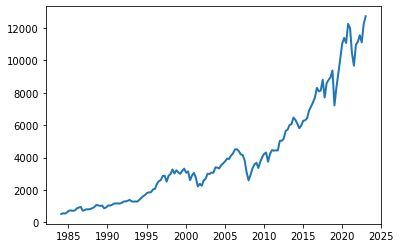

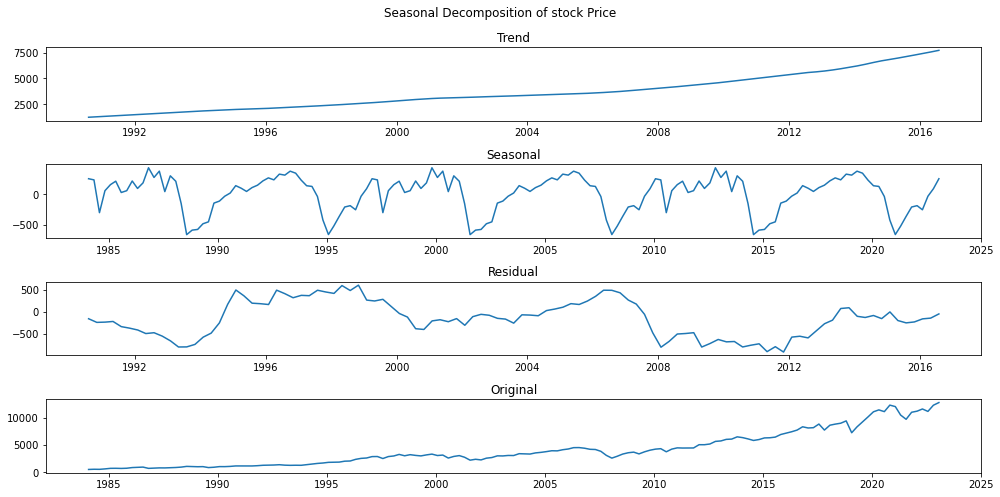

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


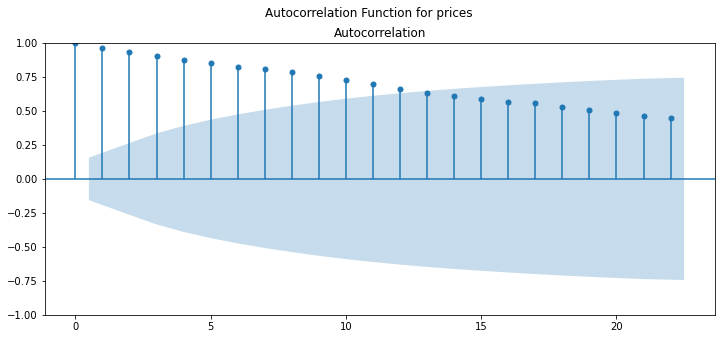

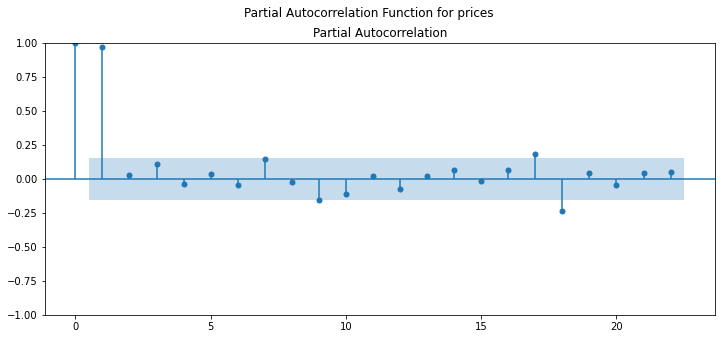

In [5]:
# Plotting the stock price level data
plt.figure(1)
plt.plot(date, price, linewidth=2)

decompositionp = seasonal_decompose(price, model = "additive", period = 52)

plt.figure(figsize=(14, 7))
plt.suptitle(f'Seasonal Decomposition of stock Price')

# Trend component
plt.subplot(411)
plt.plot(date, decompositionp.trend)
plt.title('Trend')

# Seasonal component
plt.subplot(412)
plt.plot(date, decompositionp.seasonal)
plt.title('Seasonal')

# Residual component
plt.subplot(413)
plt.plot(date, decompositionp.resid)
plt.title('Residual')

# Original Data
plt.subplot(414)
plt.plot(date, price)
plt.title('Original')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top spacing to accommodate the suptitle
plt.show()

# ACF and PACF

plt.figure(figsize=(12, 5))
plt.suptitle(f'Autocorrelation Function for prices')
plot_acf(price, ax=plt.gca())

plt.figure(figsize=(12, 5))
plt.suptitle(f'Partial Autocorrelation Function for prices')
plot_pacf(price, ax=plt.gca())
plt.show()

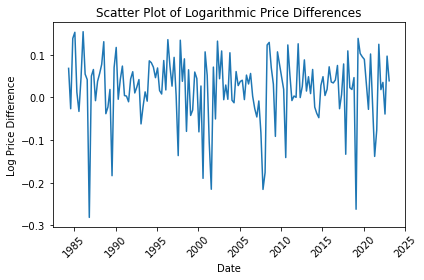

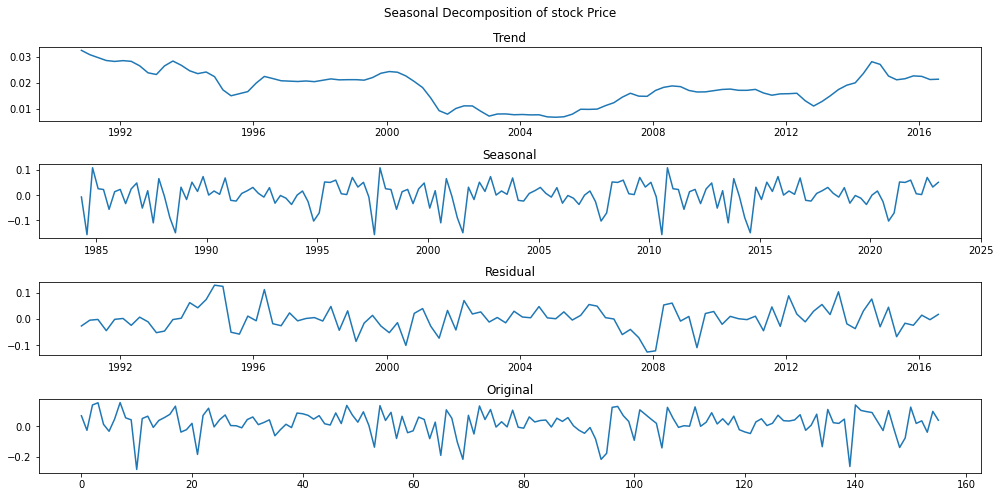

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


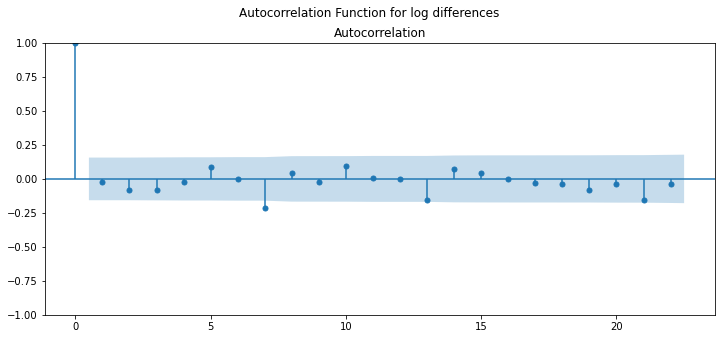

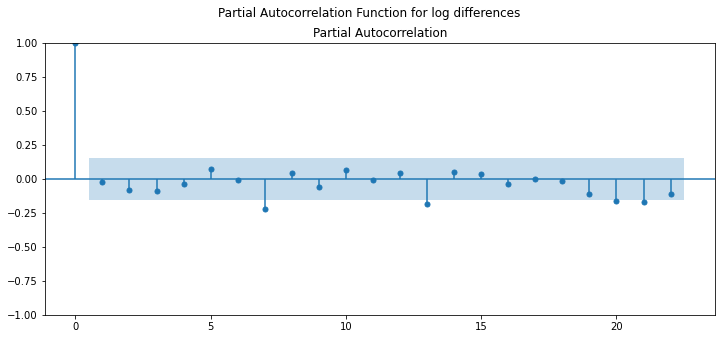

In [6]:
# Plotting the log differences data
decompositionlog = seasonal_decompose(delta_log_price, model='additive', period=52)


# Creating a scatter plot for better visualization

plt.plot(date_diff, delta_log_price)
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Log Price Difference')  # Label for the y-axis
plt.title('Scatter Plot of Logarithmic Price Differences')  # Title of the plot
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for rotated date labels
plt.show()

plt.figure(figsize=(14, 7))
plt.suptitle(f'Seasonal Decomposition of stock Price')

# Trend component
plt.subplot(411)
plt.plot(date_diff, decompositionlog.trend)
plt.title('Trend')

# Seasonal component
plt.subplot(412)
plt.plot(date_diff, decompositionlog.seasonal)
plt.title('Seasonal')

# Residual component
plt.subplot(413)
plt.plot(date_diff, decompositionlog.resid)
plt.title('Residual')

# Original Data
plt.subplot(414)
plt.plot(delta_log_price)
plt.title('Original')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top spacing to accommodate the suptitle
plt.show()

# ACF and PACF
plt.figure(figsize=(12, 5))
plt.suptitle(f'Autocorrelation Function for log differences')
plot_acf(delta_log_price, ax=plt.gca())

plt.figure(figsize=(12, 5))
plt.suptitle(f'Partial Autocorrelation Function for log differences')
plot_pacf(delta_log_price, ax=plt.gca())
plt.show()


In [7]:
# Lag effect estimation Regression
def estimate_lag_effect(ts, lags):
    """
    Estimates the effect of lagged values on the current value of a time series.

    Parameters:
    - ts (pandas.Series or numpy.ndarray): The time series data.
    - lags (int): The number of lagged terms to include in the model. Must be non-negative.

    Returns:
    - result (RegressionResults): The regression results object from statsmodels.
    """
    if not isinstance(lags, int) or lags < 0:
        raise ValueError("lags must be a non-negative integer")

    if not isinstance(ts, pd.Series):
        ts = pd.Series(ts)

    if len(ts) <= lags:
        raise ValueError("Time series is too short relative to the number of lags requested")

    df = pd.concat([ts.shift(i) for i in range(lags + 1)], axis=1)
    df.columns = ['y'] + [f'lag_{i}' for i in range(1, lags + 1)]
    df = df.dropna()

    X = df.drop(columns='y')
    X = sm.add_constant(X)
    y = df['y']

    model = sm.OLS(y, X)
    result = model.fit()

    return result


In [8]:
def check_stationarity(ts):
    # Conduct the Augmented Dickey-Fuller test
    dftest = adfuller(ts, autolag='AIC')  # Using AIC to choose the best lag
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']  # Retrieving the critical value for 5% significance

    # Print results
    print(f'ADF Statistic: {adf}')
    print(f'p-value: {pvalue}')
    print(f'Critical Values at 5%: {critical_value}')

    # Evaluate stationarity based on the p-value and the ADF statistic
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7551
Date:                Sun, 28 Apr 2024   Prob (F-statistic):              0.521
Time:                        16:45:33   Log-Likelihood:                 171.86
No. Observations:                 153   AIC:                            -335.7
Df Residuals:                     149   BIC:                            -323.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0237      0.007      3.340      0.0

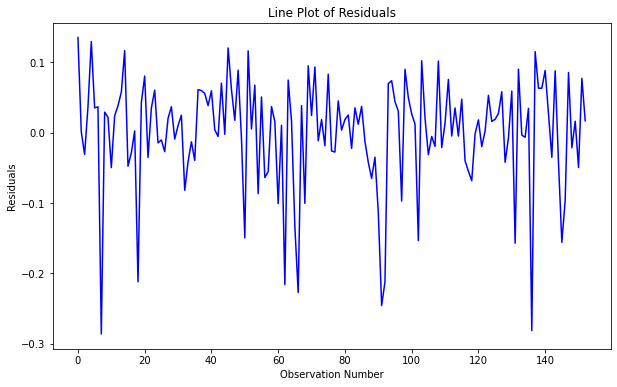

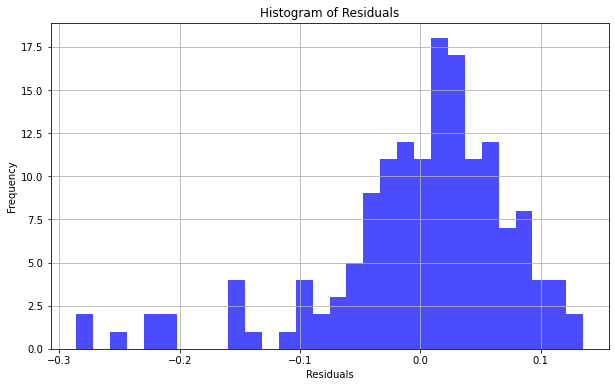

ADF Statistic: -12.621471796417833
p-value: 1.5748026271472806e-23
Critical Values at 5%: -2.880749791423677
The series is stationary


In [9]:
# Risiduals of lag effect regression
result = estimate_lag_effect(delta_log_price, lags=3)
print(result.summary())

residuals = result.resid

# Plotting the residuals on a bar graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(residuals)), residuals, color='blue')  # Changed to plot for a line plot
plt.xlabel('Observation Number')  # Label for the x-axis
plt.ylabel('Residuals')  # Label for the y-axis
plt.title('Line Plot of Residuals')  # Updated title to reflect the line plot
plt.show()

# Plotting the residuals on a histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins= 30, color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

check_stationarity(residuals)

In [10]:
def simulate_critical_values(num_simulations, T, r0):
    critical_values = []
    for _ in range(num_simulations):
        # Generate a unit root process
        series = np.random.normal(size=T).cumsum()
        # Placeholder for SADF/GSADF calculation: this should ideally be replaced
        # with a function that calculates the SADF/GSADF statistic.
        stat = adfuller(series, maxlag=int(r0*T), regression='c', autolag=None)[0]
        critical_values.append(stat)

    # Determine the 90%, 95%, and 99% critical values
    critical_values = np.percentile(critical_values, [90, 95, 99])
    return critical_values

# Example usage
num_simulations = 2000

critical_values = simulate_critical_values(num_simulations, T, r0)
print("Critical values at 90%, 95%, 99%:", critical_values)


Critical values at 90%, 95%, 99%: [-0.05197344  0.38309749  1.14302401]


In [11]:
# Calculate the SADF statistic
dateS = date[swindow0:]

badfs = np.zeros(dim)
for i in range(swindow0, T):
    result = adfuller(price[:i+1], maxlag=2, regression='c', autolag=None)
    badfs[i - swindow0] = result[0]
sadf = np.max(badfs)

print('The SADF statistic:', sadf)
print('The critical values:', critical_values)

The SADF statistic: 2.7631788715018977
The critical values: [-0.05197344  0.38309749  1.14302401]


In [12]:
# Calculate the Generalized SADF statistic
bsadfs = np.zeros(dim)
for r2 in range(swindow0, T):
    dim0 = r2 - swindow0 + 1
    rwadft = np.zeros(dim0)
    for r1 in range(dim0):
        result = adfuller(price[r1:r2+1], maxlag=2, regression='c', autolag=None)
        rwadft[r1] = result[0]
    bsadfs[r2 - swindow0] = np.max(rwadft)

gsadf = np.max(bsadfs)

print('The GSADF statistic:', gsadf)
print('The critical values:', critical_values)

The GSADF statistic: 3.5865693903218503
The critical values: [-0.05197344  0.38309749  1.14302401]


In [13]:
print(len(dateS), len(bsadfs), len(badfs))


133 134 134


In [14]:
# Removing excess values not in the date range
badfs_plt = badfs[:-1]
bsadfs_plt = bsadfs[:-1]


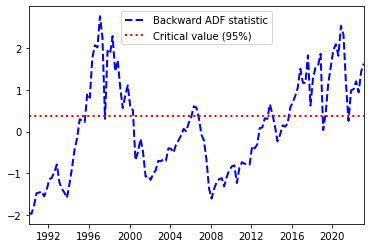

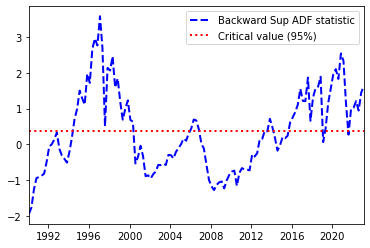

In [15]:
# Plot the backward ADF statistics
plt.figure(1)
plt.plot(dateS, badfs_plt, '--b', linewidth=2)
plt.plot(dateS, [critical_values[1]]*len(dateS), ':r', linewidth=2)
plt.xlim([dateS[0], dateS[-1]])
plt.legend(['Backward ADF statistic', 'Critical value (95%)'])



# Plot the Generalized SADF statistics
plt.figure(2)
plt.plot(dateS, bsadfs_plt, '--b', linewidth=2)
plt.plot(dateS, [critical_values[1]]*len(dateS), ':r', linewidth=2)
plt.xlim([dateS[0], dateS[-1]])
plt.legend(['Backward Sup ADF statistic', 'Critical value (95%)'])


a discussion of who might be interested in your analysis`

a discussion of how your analysis might fit into an application or investigation

Considering various real-world contexts in which our analysis could be essential. We hve identified the below contexts:

### 1. Financial Market Monitoring and Forecasting
The analysis could be integrated into a market monitoring system used by financial institutions or investment firms. By decomposing the stock price data into trend, seasonal, and residual components, the system could provide ongoing insights into market dynamics, helping analysts predict future movements and identify optimal trading opportunities.

#### Application:
- **Automated Trading Systems**: Implement the findings into algorithmic trading strategies that automatically adjust buy/sell actions based the on detected trends and seasonal patterns in our analysis.
- **Risk Management Tools**: Use the residual analysis to gauge unexplained volatility, improving risk assessment models for portfolio management.

### 2. Economic Research and Policy Making
Government agencies or economic research institutions can use our analysis as part of broader economic studies to understand the health and direction of the economy, which is often reflected in stock market performance.

#### Application:
- **Economic Indicators**: Utilize trend data as a leading indicator of economic activity and to forecast economic cycles.
- **Policy Development**: Analyze the impact of fiscal and monetary policies on the stock market by observing changes in the trend and residual components before and after policy announcements.

### 3. Corporate Financial Planning
Corporations can use the analysis to better understand how the market values their stock and to plan their financial strategies accordingly. Insights into seasonal trends can also help in scheduling financial events like issuing new stock or dividends.

#### Application:
- **Strategic Planning**: Integrate trend analysis in strategic planning for investments, expansions, or divestitures.
- **Budgeting and Financial Scheduling**: Leverage seasonal analysis to optimize the timing of financial operations to match market conditions.

### 4. Investment Portfolio Management
Portfolio managers can utilize our analysis to enhance the performance of investment portfolios. By understanding the components of stock movements, they can make more informed decisions regarding asset allocation and hedging strategies.

#### Application:
- **Asset Allocation**: Use trend and seasonal data to adjust asset allocations in a portfolio periodically to maximize returns or minimize risk exposure.
- **Hedging Strategies**: Employ insights from the residual component to design hedging strategies that protect against unexpected market movements.

### 5. Educational and Training Programs
Academic institutions and financial training programs can use the analysis as a case study to educate students and professionals about advanced financial analysis techniques and their practical implications.

#### Application:
- **Curriculum Development**: Incorporate the methodology and findings into finance and economics courses to teach students about time series analysis and its applications in real-world financial decision-making.
- **Professional Development Workshops**: Use the analysis in workshops aimed at financial professionals to enhance their analytical skills and understanding of market dynamics.

**a discussion of how your analysis is limited and could be improved**

# **The limitations of the analysis and potential improvements**

**1. Data Limitations**

  Sample Size and Frequency: The effectiveness of the seasonal decomposition might be limited if the data doesn’t cover multiple cycles or if the sampling frequency doesn’t adequately capture the fluctuations.

  Data Quality: Issues like missing values or noise in the data can affect the accuracy of the decomposition and autocorrelation analyses.

**Possible improvements:**

  Expand Data Set: Incorporating more data points across a longer time span can help us capture more cycles and trends, improving the robustness of the analysis.

  Data Cleaning and Preprocessing: Implementing thorough preprocessing steps such as filling missing values, smoothing, and outlier detection can enhance data quality.


**2. Model Assumptions**

Linearity and Additivity: The seasonal decomposition assumes that the series is linear and additive, which might not hold true for all stock price data, particularly during periods of high volatility or structural market changes.

Statistical Significance: The autocorrelation functions might sometimes identify spurious correlations, especially in shorter or non-stationary time series.

**Possible improvements:**

Testing Model Assumptions: Conduct tests for stationarity, linearity, and additivity before applying the model. If assumptions are violated, consider using alternative non-linear or multiplicative models.
Enhanced Statistical Techniques: Use advanced statistical tests to confirm the significance of the correlations detected by ACF and PACF, adjusting for multiple comparisons if necessary.


**3. Analytical Scope**

Univariate Analysis: Currently, the analysis focuses solely on price data, thereby ignoring other potentially influential factors like volume, market sentiment, or macroeconomic indicators.

Lack of Predictive Modeling: While decomposition and correlation analyses provide insights into past patterns, they do not directly offer predictive power.

**Possible improvements:**

Incorporate Multivariate Analysis: By expanding the analysis to include multiple variables that might affect stock prices, using techniques such as Vector Autoregression (VAR) or multivariate time series models.

Predictive Analytics: We can develop predictive models based on the identified components and correlations, such as ARIMA or machine learning models, to forecast future price movements.


**4. Generalizability**

Market Specificity: The findings from a single stock or a specific market might not be generalizable to other stocks or markets without modifications.

Impact of External Events: Market anomalies, such as financial crises or unexpected geopolitical events, can disrupt established patterns, limiting the effectiveness of historical data analysis.

**Possible improvements:**

Cross-Validation Across Markets: We could test the analysis on different markets and types of stocks to assess its robustness and adaptability.

Dynamic Modeling: We could also implement models that can adjust to sudden changes in market conditions, such as regime-switching models or models incorporating news sentiment analysis.